# 신용카드 채무 불이행 고객 예측(credit card analysis)

## 문제 상황  

카드사 A는 최근 점점 늘어가는 채무 불이행 고객 때문에 골치를 썩고 있다. 네이버페이, 카카오페이 등 간편결제 회사와 같은 경쟁사들이 등장하고  
있는 어려운 상황에서 채무 불이행 고객으로 인한 손실이 늘어나고 있는 상황이다. 이에 신용카드 채무 불이행이 예상되는 고객들을 블랙리스트로  
관리하고, 한도를 줄여서 최대한의 손실을 막아보고자 한다.

## 문제 해결 프로세스  

1. 문제정의

- 신용카드 대금 채무 불이행으로 인한 손실

2. 기대효과

- 채무 불이행으로 인한 손실 감소  

3. 해결방안

- 채무 불이행 고객 예측 및 블랙리스트 관리(신용한도 조정)  

4. 성과측정

- 블랙리스트 관리 후 채무 불이행 손실 감소률(%)

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('C:/Users/USER/Desktop/Practice Project/신용카드 채무 불이행 고객 예측/신용카드 채무 불이행 고객 예측.xlsx')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [3]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### 변수 해석 3가지  

1. 결측치 존재 여부

- 전체 데이터에서 결측치가 존재하지 않는다.

- 만약, 결측치가 존재했다면 전체 데이터의 약 5%정도 미만의 개수는 제거해도 좋다.

- 결측치를 대체하는 경우, object형태는 최빈값으로 대체하고, int64 or float64형태는 평균으로 대체하거나 KNN을 사용할 수 있다.  

2. 데이터 타입 설명

- int64형태 25개로 총 25개의 변수가 존재한다.  

3. 컬럼 설명

- ID : 고객 아이디
- LIMIT_BAL : 신용한도
- SEX : 성별(1-남성, 2-여성)
- EDUCATION : 교육수준(1-대학원, 2-대학교, 3-고등학교, 4-기타, 5-모름, 6-모름)
- MARRIAGE : 결혼(1-기혼, 2-독신, 3-기타)
- AGE : 나이
- PAY_0 : 05년9월 상환상태(-2-무소비, -1-정액 결제, 0-리볼빙크레딧, 1-한달 지연, ..., 9-9개월 지불지연)
- PAY_2 : 05년8월 상환상태
- PAY_3 : 05년7월 상환상태
- PAY_4 : 05년6월 상환상태
- PAY_5 : 05년5월 상환상태
- PAY_6 : 05년4월 상환상태
- BILL_AMT1 : 05년9월 청구서 금액
- BILL_AMT2 : 05년8월 청구서 금액
- BILL_AMT3 : 05년7월 청구서 금액
- BILL_AMT4 : 05년6월 청구서 금액
- BILL_AMT5 : 05년5월 청구서 금액
- BILL_AMT6 : 05년4월 청구서 금액
- PAY_AMT1 : 05년9월 지불금액
- PAY_AMT2 : 05년8월 지불금액
- PAY_AMT3 : 05년7월 지불금액
- PAY_AMT4 : 05년6월 지불금액
- PAY_AMT5 : 05년5월 지불금액
- PAY_AMT6 : 05년4월 지불금액
- default payment next month : 채무 불이행 여부

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


우선 describe로 이상치를 판단하기 위해서는 mean, min, max 값을 확인하는 것이 좋다. mean과 min, mean과 max 값이 std에 비해 한참 차이가 난다면, 이상치가 있을 가능성이 높다. 이러한 이상치를 정확히 판단하기 위해서는 아래와 같이 boxplot으로 시각화하여 보는 것이 정확하다.

In [3]:
outlier = pd.melt(df, var_name = '이상치 탐색 변수', value_name = '이상치 탐색 값')
outlier

,이상치 탐색 변수,이상치 탐색 값
0,ID,1
1,ID,2
2,ID,3
3,ID,4
4,ID,5
...,...,...
749995,default payment next month,0
749996,default payment next month,0
749997,default payment next month,1
749998,default payment next month,1


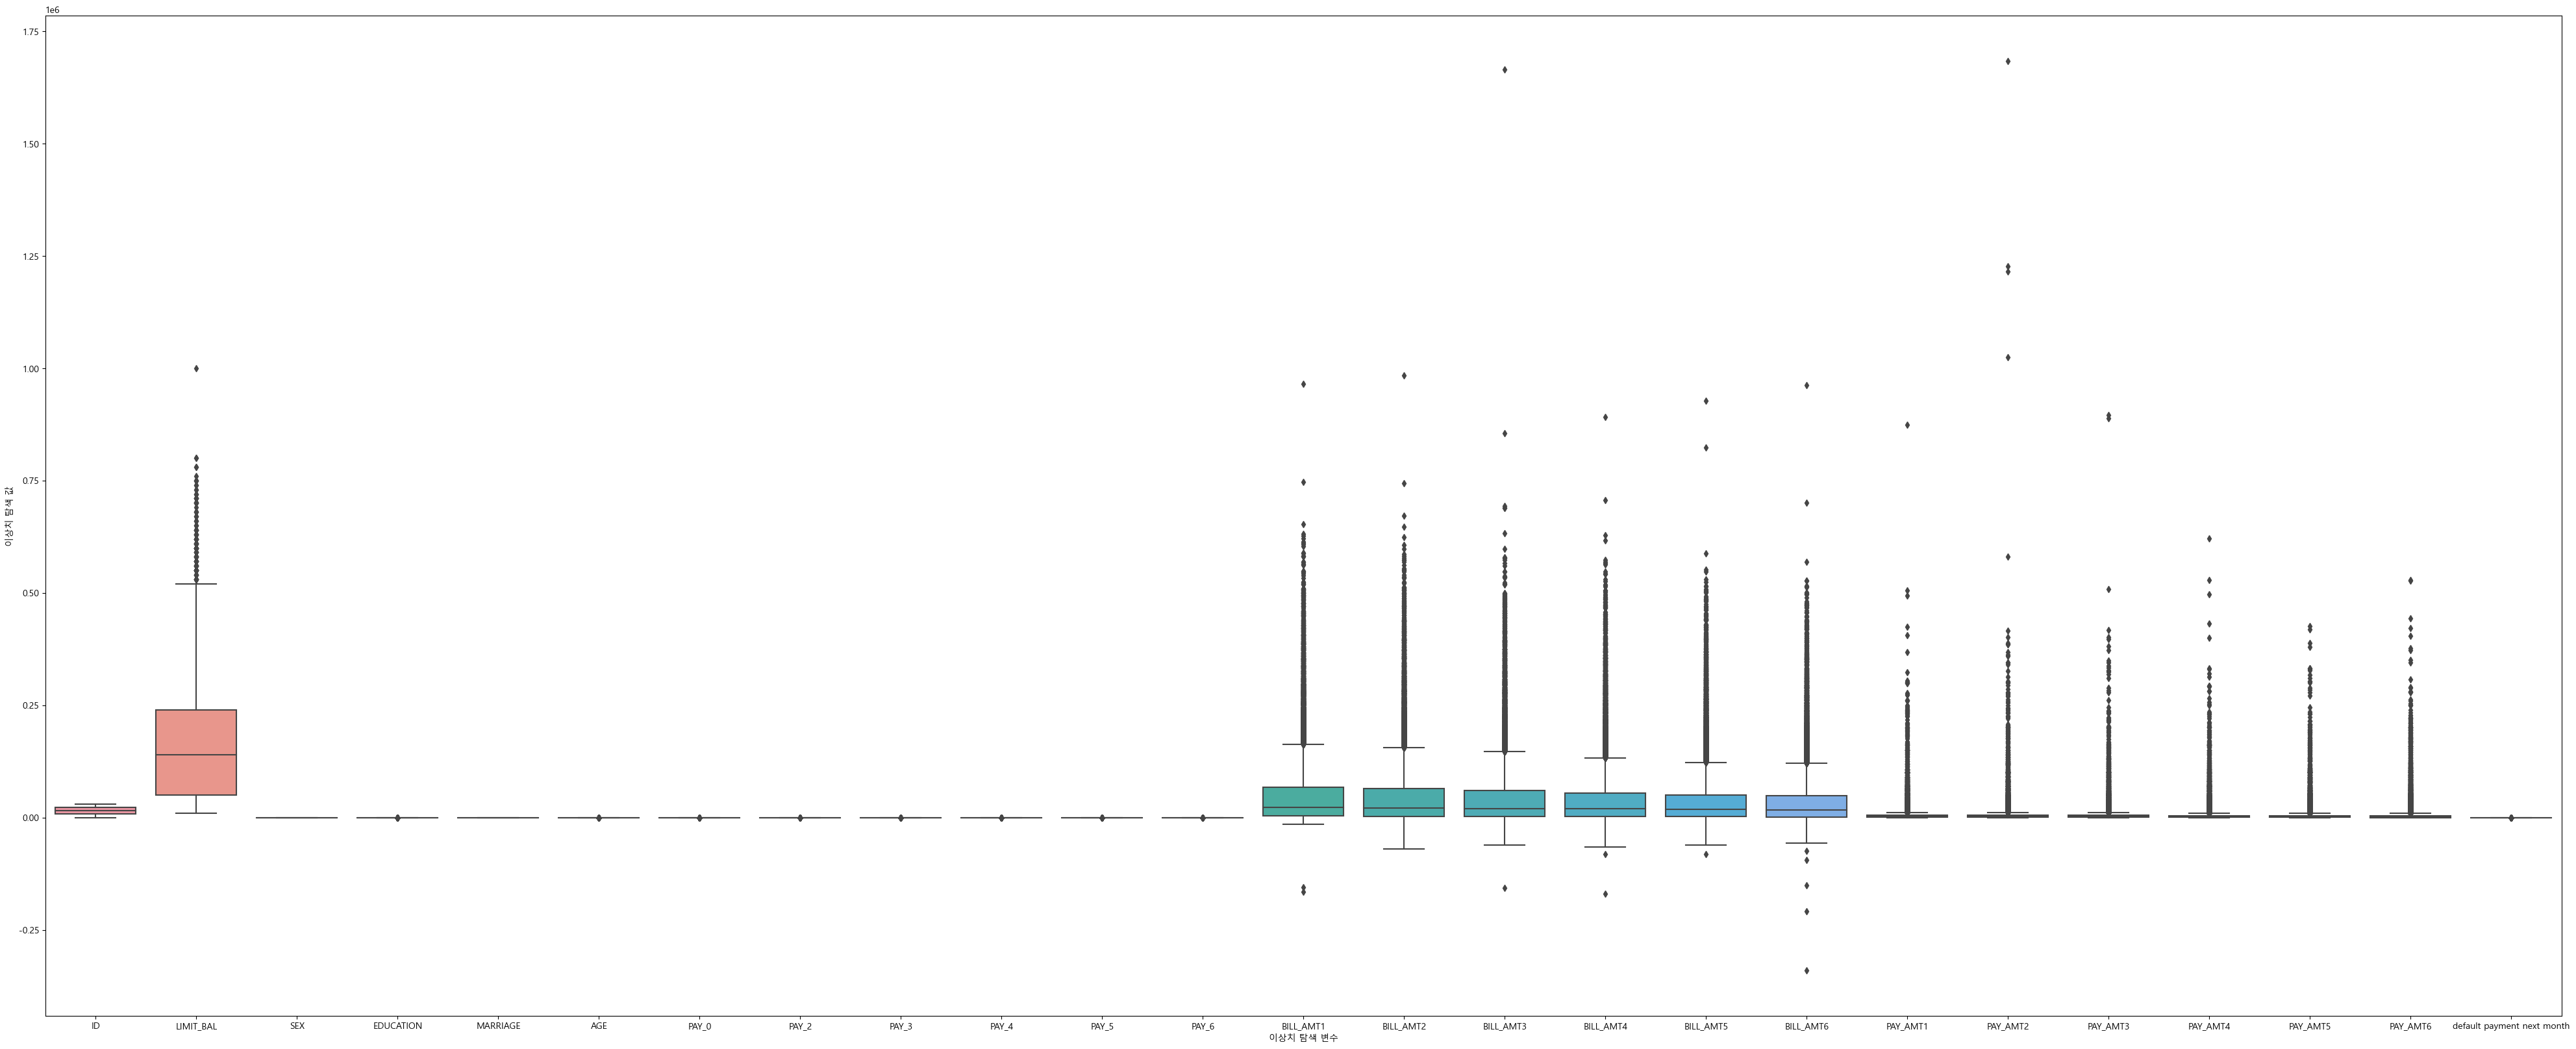

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (50,20))
sns.boxplot(x = '이상치 탐색 변수', y = '이상치 탐색 값', data = outlier)
plt.xticks(range(25), df.columns)
plt.show()

이상치를 탐색하기 위해서 수치형 변수들만 선택해서 boxplot으로 시각화하였다. 이상치의 값이 연속적으로 나타나면, 보통 의미있는 값일 확률이 높기 때문에 따로 제거하거나 대체하지 않고, BILL_AMT3, PAY_AMT2 변수처럼 눈에 띄는 이상치가 있을 경우에는 보통 제거하거나 대체하는 경우가 많다. 하지만, BILL_AMT3, PAY_AMT2는 '청구금액, 지불금액'을 의미하므로 이상치가 있을 확률이 낮다고 판단하여 그대로 둔다. 예를 들어, Age 변수가 999값이 있으면 제거하거나 대체하는 것이 옳다. 그리고 음수값이 확인되는 값들은 이전에 미리 지불한 금액에 대한 값일수 있기에 그대로 두는 것이 좋을 듯 하다.

In [6]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [7]:
print("평균 채무 불이행률 : ", (6636/(23364+6636)) * 100)

평균 채무 불이행률 :  22.12


In [20]:
df_c = df[['SEX', 'EDUCATION', 'MARRIAGE']]
df_c

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


### 범주형(의미상) 변수 분포 - 고객 정보 확인

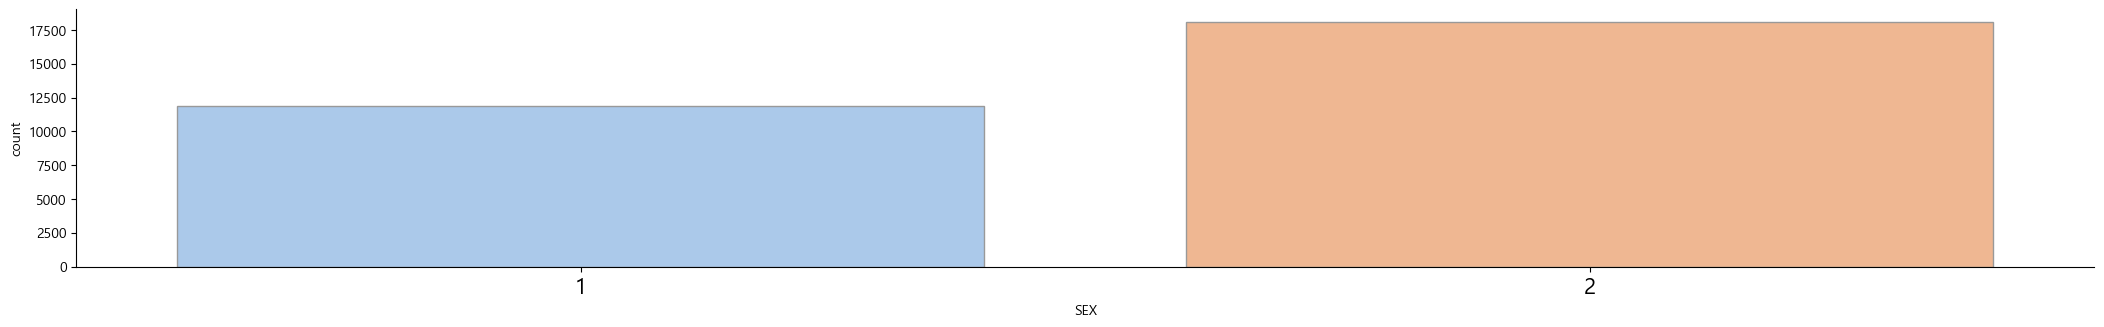

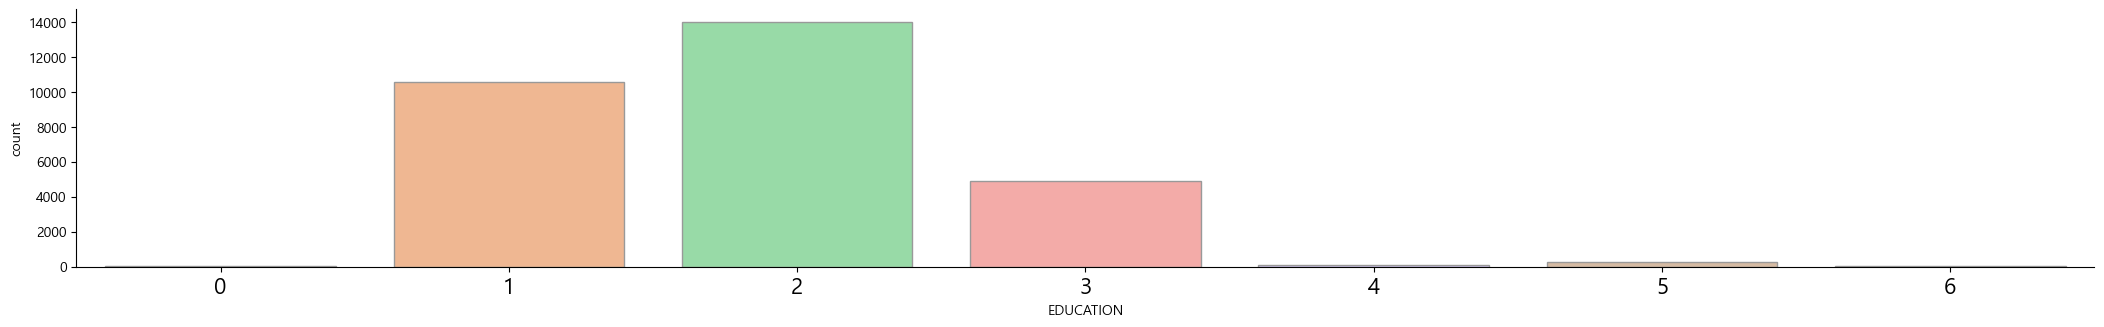

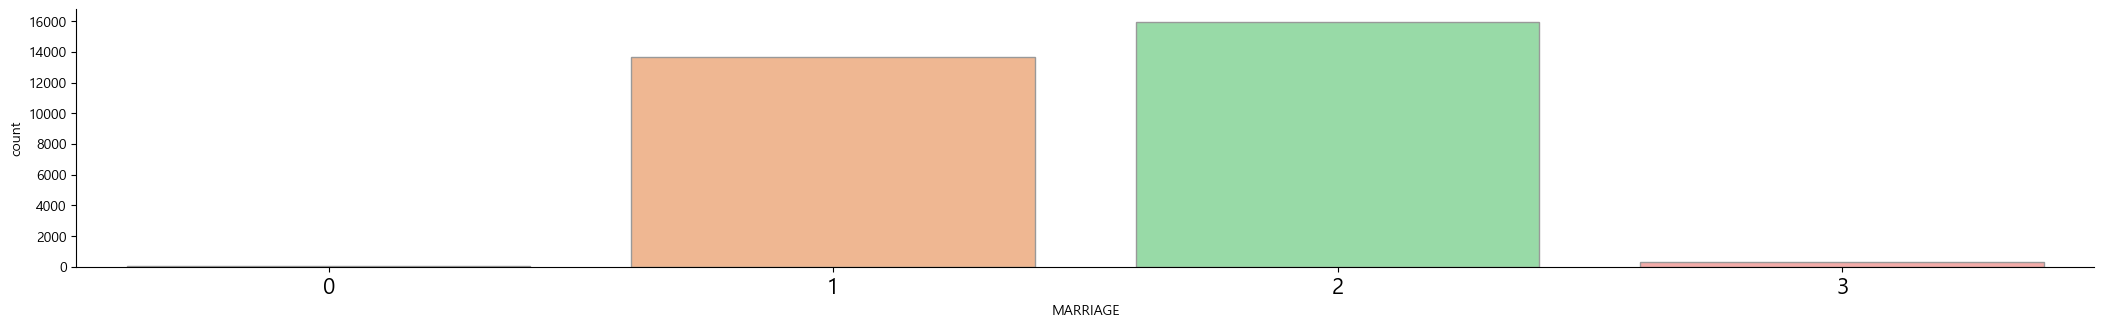

In [21]:
for i in df_c :
    sns.catplot(x=i, kind="count",palette="pastel", edgecolor=".6",data=df);
    plt.gcf().set_size_inches(25, 3);
    plt.xticks(fontsize=16);

성별은 여성이 남성보다 고객이 더욱 많고, 교육수준은 대학교가 가장 많고, 결혼은 독신이 가장 많은것을 확인할 수 있다

In [22]:
import numpy as np
df['EDUCATION'] = np.where((df['EDUCATION']>=4) | (df['EDUCATION']==0) , 4, df['EDUCATION'])

교육 수준 0, 4, 5, 6은 데이터가 너무 적으므로 하나의 카테고리로 통합한다

In [23]:
df['MARRIAGE'] = np.where((df['MARRIAGE']>=3) | (df['MARRIAGE']==0) , 3, df['MARRIAGE'])

결혼 0, 3은 데이터가 너무 적으므로 하나의 카테고리로 통합한다

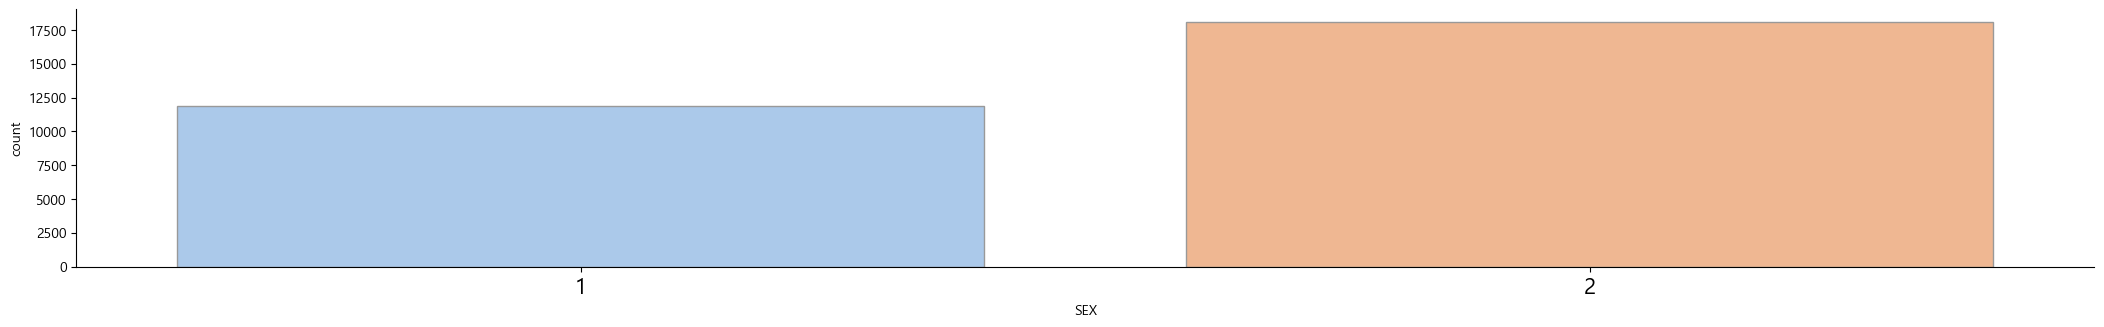

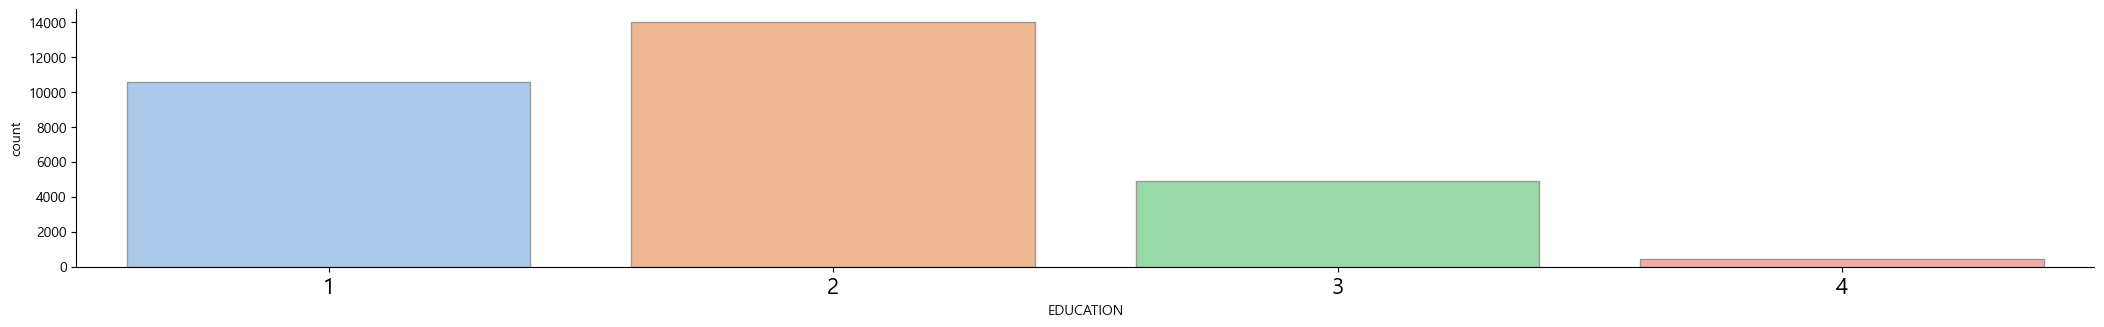

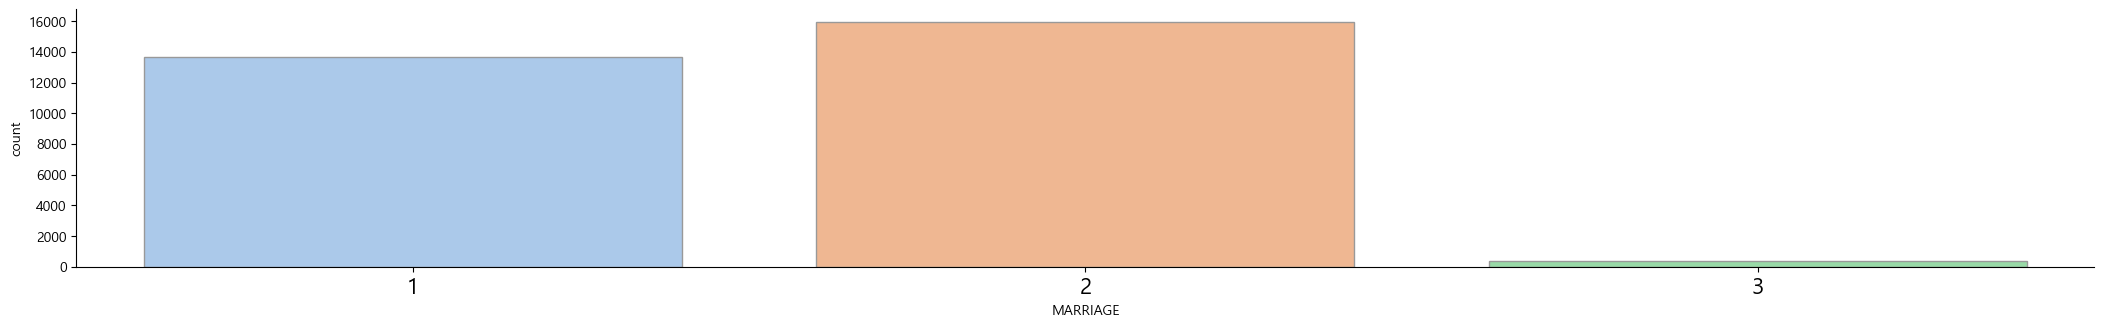

In [24]:
for i in df_c :
    sns.catplot(x=i, kind="count",palette="pastel", edgecolor=".6",data=df);
    plt.gcf().set_size_inches(25, 3);
    plt.xticks(fontsize=16);

### 청구금액 대비 지불 수준 확인

In [25]:
df[['ID', 'BILL_AMT1', 'PAY_AMT1', 'BILL_AMT2', 'PAY_AMT2', 'BILL_AMT3', 'PAY_AMT3', 'BILL_AMT4', 'PAY_AMT4', 'BILL_AMT5', 'PAY_AMT5', 'BILL_AMT6', 'PAY_AMT6']]

,ID,BILL_AMT1,PAY_AMT1,BILL_AMT2,PAY_AMT2,BILL_AMT3,PAY_AMT3,BILL_AMT4,PAY_AMT4,BILL_AMT5,PAY_AMT5,BILL_AMT6,PAY_AMT6
0,1,3913,0,3102,689,689,0,0,0,0,0,0,0
1,2,2682,0,1725,1000,2682,1000,3272,1000,3455,0,3261,2000
2,3,29239,1518,14027,1500,13559,1000,14331,1000,14948,1000,15549,5000
3,4,46990,2000,48233,2019,49291,1200,28314,1100,28959,1069,29547,1000
4,5,8617,2000,5670,36681,35835,10000,20940,9000,19146,689,19131,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,188948,8500,192815,20000,208365,5003,88004,3047,31237,5000,15980,1000
29996,29997,1683,1837,1828,3526,3502,8998,8979,129,5190,0,0,0
29997,29998,3565,0,3356,0,2758,22000,20878,4200,20582,2000,19357,3100
29998,29999,-1645,85900,78379,3409,76304,1178,52774,1926,11855,52964,48944,1804


청구(BILL) 대비 지불(PAY)이 낮다면 연체 확률이 높을 것이고, 청구 대비 지불이 높다면, 과거 연체비용까지 지불했을 가능성이 크다. 예를 들어, 9월 청구금액이 3913달러인데 9월 지불금액은 0달러로 지불을 하지 않았으므로 해당 고객은 연체 확률이 매우 높을 것이라고 예측할 수 있다

In [26]:
df['PAY/BILL'] = round(((df['PAY_AMT1'] + df['PAY_AMT2'] + df['PAY_AMT3'] + df['PAY_AMT4'] + df['PAY_AMT5'] + df['PAY_AMT6']) 
                  / (df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + df['BILL_AMT5'] + df['BILL_AMT6'])) * 100, 1)

과거 6개월동안 총 청구 대비 지불 수준을 확인하기 위해 'PAY/BILL'이라는 새로운 컬럼을 생성한다

In [27]:
df['PAY/BILL'] 

0         8.9
1        29.3
2        10.8
3         3.6
4        54.0
         ... 
29995     5.9
29996    68.4
29997    44.4
29998    55.2
29999     3.6
Name: PAY/BILL, Length: 30000, dtype: float64

3번 고객은 3.6%밖에 채무를 못갚았지만, 29996 고객은 68.4%로 상당한 채무를 갚은것을 확인할 수 있다

In [28]:
df['PAY/BILL'] = df['PAY/BILL'].replace([np.inf, -np.inf], 0)

총 청구 대금이 0인 고객이 존재할 경우, inf로 표현되기 때문에 전처리를 통해 다시 0으로 나타내준다

In [29]:
df['PAY/BILL'] = np.where(df['PAY/BILL']>100, 100, df['PAY/BILL'])
df['PAY/BILL'] = np.where(df['PAY/BILL']<0, 0, df['PAY/BILL'])

음수값이나 확률이 100보다 넘어가는 경우가 없기 때문에 해당 값을 이상치로 판단하고 100보다 크면 100으로 대체하고 0보다 작으면 0으로 대체한다

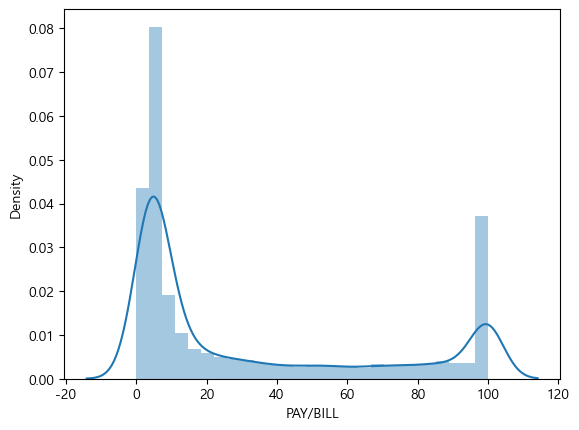

In [30]:
sns.distplot(df['PAY/BILL']);

대부분의 고객이 총 청구금액 대비 20% 수준에서만 지불을 하고 있는 것을 확인할 수 있다

## 고객 정보 기반 채무 불이행 고객 예측

In [32]:
df_profile=pd.DataFrame(df['default payment next month'].groupby(df['SEX']).value_counts())
df_profile.columns=['cnt']
df_profile=df_profile.reset_index()

df_profile = pd.pivot_table(df_profile,                        
                    index = 'SEX',                       
                    columns = 'default payment next month',   
                    values = 'cnt')                           

df_profile = df_profile.reset_index()
df_profile.columns.names=['']

df_profile['ratio'] =   round((df_profile.iloc[:,2] / (df_profile.iloc[:,1] + df_profile.iloc[:,2])) * 100,1)
df_profile=df_profile.sort_values(by=['ratio'], ascending=False)
df_profile

,SEX,0,1,ratio
0,1,9015,2873,24.2
1,2,14349,3763,20.8


여성보다 남성이 채무 불이행률이 높은 것을 확인할 수 있다

In [31]:
df_profile=pd.DataFrame(df['default payment next month'].groupby(df['EDUCATION']).value_counts())
df_profile.columns=['cnt']
df_profile=df_profile.reset_index()

df_profile = pd.pivot_table(df_profile,                        
                    index = 'EDUCATION',                       
                    columns = 'default payment next month',   
                    values = 'cnt')                           

df_profile = df_profile.reset_index()
df_profile.columns.names=['']

df_profile['ratio'] =   round((df_profile.iloc[:,2] / (df_profile.iloc[:,1] + df_profile.iloc[:,2])) * 100,1)
df_profile=df_profile.sort_values(by=['ratio'], ascending=False)
df_profile

,EDUCATION,0,1,ratio
2,3,3680,1237,25.2
1,2,10700,3330,23.7
0,1,8549,2036,19.2
3,4,435,33,7.1


대학생이 채무 불이행률이 가장 높은 것을 확인할 수 있다

In [33]:
df_profile=pd.DataFrame(df['default payment next month'].groupby(df['MARRIAGE']).value_counts())
df_profile.columns=['cnt']
df_profile=df_profile.reset_index()

df_profile = pd.pivot_table(df_profile,                        
                    index = 'MARRIAGE',                       
                    columns = 'default payment next month',   
                    values = 'cnt')                           

df_profile = df_profile.reset_index()
df_profile.columns.names=['']

df_profile['ratio'] =   round((df_profile.iloc[:,2] / (df_profile.iloc[:,1] + df_profile.iloc[:,2])) * 100,1)
df_profile=df_profile.sort_values(by=['ratio'], ascending=False)
df_profile

,MARRIAGE,0,1,ratio
2,3,288,89,23.6
0,1,10453,3206,23.5
1,2,12623,3341,20.9


기혼이나 독신도 아닌 기타 고객이 채무 불이행률이 가장 높은 것을 확인할 수 있다

## 신용한도 기반 채무 불이행 고객 예측

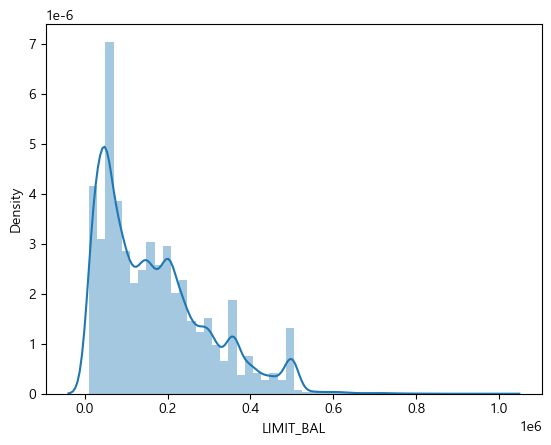

In [35]:
sns.distplot(df['LIMIT_BAL']);

In [36]:
df['LIMIT_BAL']

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64

In [37]:
df['LIMIT_GP'] = np.where (df['LIMIT_BAL'] <= 100000, 1, 
                           np.where(df['LIMIT_BAL'] <= 300000, 2,
                           np.where(df['LIMIT_BAL'] <= 500000, 3, 4)))

df[['ID', 'LIMIT_BAL', 'LIMIT_GP']]

,ID,LIMIT_BAL,LIMIT_GP
0,1,20000,1
1,2,120000,2
2,3,90000,1
3,4,50000,1
4,5,50000,1
...,...,...,...
29995,29996,220000,2
29996,29997,150000,2
29997,29998,30000,1
29998,29999,80000,1


연속형 변수의 구간화 작업이 필요하다

100,000 이하 / 100,000 초과 300,000 이하 / 300,000 초과 500,000 이하 / 500,000 초과

In [38]:
df['LIMIT_GP'].value_counts()

2    12939
1    12498
3     4357
4      206
Name: LIMIT_GP, dtype: int64

In [39]:
df_profile=pd.DataFrame(df['default payment next month'].groupby(df['LIMIT_GP']).value_counts())
df_profile.columns=['cnt']
df_profile=df_profile.reset_index()

df_profile = pd.pivot_table(df_profile,                        
                    index = 'LIMIT_GP',                       
                    columns = 'default payment next month',   
                    values = 'cnt')                           

df_profile = df_profile.reset_index()
df_profile.columns.names=['']

df_profile['ratio'] =   round((df_profile.iloc[:,2] / (df_profile.iloc[:,1] + df_profile.iloc[:,2])) * 100,1)
df_profile=df_profile.sort_values(by=['ratio'], ascending=False)
df_profile

,LIMIT_GP,0,1,ratio
0,1,8814,3684,29.5
1,2,10592,2347,18.1
2,3,3775,582,13.4
3,4,183,23,11.2


신용한도가 높을수록 채무 불이행률이 점점 감소하는 것을 확인할 수 있다

## ML 활용 채무 불이행 고객 예측

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['ID','default payment next month', 'PAY/BILL', 'LIMIT_GP'], axis=1)
Y=df['default payment next month']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(21000, 23)
(21000,)
(9000, 23)
(9000,)


위에서 새로 생성한 파생변수들은 제거 후에 모델링을 진행한다

In [42]:
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state=2023)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16355
           1       1.00      1.00      1.00      4645

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.66      0.38      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.69      9000
weighted avg       0.80      0.82      0.80      9000



1. precision  

- 채무 불이행을 할 것 같은 고객들을 예측한 고객들 중에서 실제로 채무 불이행을 한 고객의 확률

- 장점 : 최대한 많은 채무 불이행 고객들을 후보리스트로 만들어서 관리가 가능하며, 손실을 최대한 방지할 수 있다.

- 단점 : 실제로 그렇지 않은 고객들이 포함될 수 있다.


2. recall  

- 실제로 채무 불이행을 한 고객들중에서 채무 불이행 예측을 맞춘 확률

- 장점 : 실제로 채무 불이행을 할것같은 고객들만 관리할 수 있다.

- 단점 : 채무 불이행 고객들이 적어서 모수가 작아지기 때문에 손실이 커질 우려가 있다.  

3. 과적합

- train과 test의 precision이 비슷하면 과적합이 발생하지 않은 것이고, 위와 같이 크게 차이가 나면 과적합이 발생한 것이라고 볼 수 있다.

- 이러한 경우, 과적합을 방지하기 위해 Hyper parameter 튜닝을 통해 해결할 수 있다.  

In [43]:
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1] 
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1] 

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.9999964393359263
roc_score_test : 0.7649648485956816


4. roc_auc_score

- 이진 분류기의 성능을 평가할때 사용하는 지표로 100에 가까울 수록 모델 성능이 좋은 것이라고 할 수 있다.

- 다양한 threshold에 대한 이진분류기의 성능을 한번에 표시한 것이다.

- 여기서도 train과 test의 roc_score값이 크게 차이가 나는 것을 확인할 수 있으며, 과적합이 발생했다고 알 수 있다.  

5. predict

- 0과 1로 나누는 것(0.5 이하는 0, 초과는 1)

6. predict_proba

- 0일 확률과 1일 확률로 나누는 것

- [:, 1]의 의미는 전체 고객을 불러오기 위해 행을 :, 채무 불이행 고객들의 확률만 추출하기 위해 2번째에 있는 열인 1을 불러온다는 의미이다.

- 1번째에 있는 열은 채무를 이행한 고객들의 확률이다.

In [44]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [400, 500],
           'max_depth' : [6, 8, 10, 12]
            }

rf_clf = RandomForestClassifier(random_state = 2023, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1, scoring='precision')
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'n_estimators': 400}
최고 예측 정확도: 0.6805


위의 n_jobs가 -1이면 컴퓨터의 모든 코어를 사용한다는 의미이다  

scoring을 precision으로 선택한 이유는 고객들의 수가 상당히 많기 때문에 최대한 손실을 방지하는 것이 더욱 좋을 것 같다는 판단이 들어서다

In [45]:
rfc = RandomForestClassifier(n_estimators=400, max_depth=6, random_state = 2023)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     16355
           1       0.72      0.34      0.46      4645

    accuracy                           0.82     21000
   macro avg       0.78      0.65      0.68     21000
weighted avg       0.81      0.82      0.80     21000

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7009
           1       0.70      0.34      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.77      0.65      0.68      9000
weighted avg       0.81      0.82      0.80      9000



최적의 하이퍼 파라미터를 통해 다시 랜덤포레스트를 학습시킨 결과, train의 precision이 0.72이고 test의 precision이 0.70으로 거의 정확하게 예측을 했다고 할 수 있다. 과적합이 해결되었고 성능이 좋은 모델이라고 할 수 있다

In [46]:
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1] 
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1] 


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.7913563925273444
roc_score_test : 0.7788354056372524


여기서도 최적의 하이퍼 파라미터를 통해 train과 test의 roc_score값이 거의 비슷한 것을 보아 과적합이 해결되었다고 할 수 있다. 이전보다 성능도 더욱 좋아졌음을 확인할 수 있다

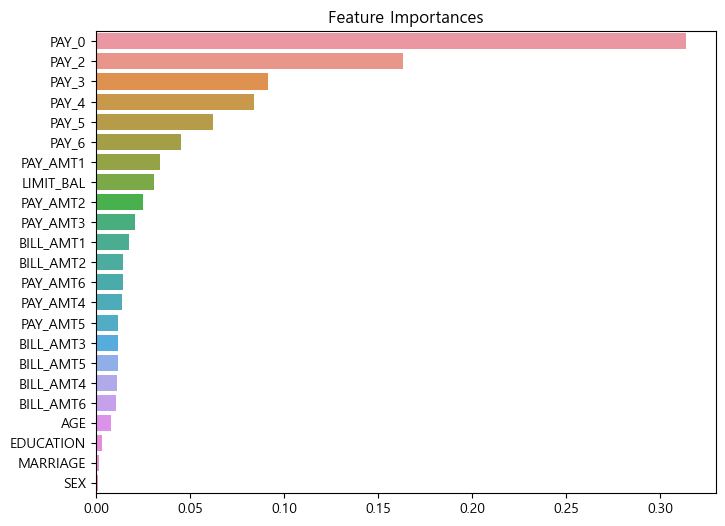

In [47]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:30]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.rc('xtick', labelsize=5)
plt.show()

Feature IMP 분석을 통해 중요변수를 파악한다. 위의 상위 변수들을 살펴보면, 직전 월의 상환상태가 현재 채무 불이행 고객을 예측하는데 가장 중요한 변수들임을 확인할 수 있다. 하지만, 고객 정보가 예측에 거의 영향을 주지 않는 것을 알 수 있으며 신용한도가 상당한 영향을 미치는 것을 알 수 있다. 따라서 신용한도와 상환상태를 주의 깊게 살펴가면서 예측을 진행하는 것이 좋은 판단이다  

AGE, EDUCATION, MARRIAGE,SEX 변수같은 고객 정보들은 제거하고 다시 모델링 해보는 것도 좋다

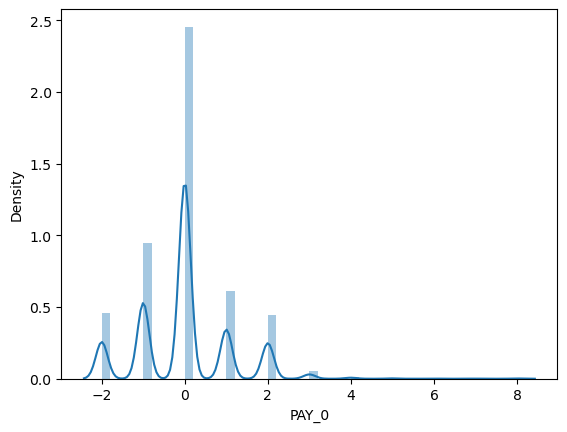

In [2]:
import seaborn as sns

sns.distplot(df['PAY_0']);

가장 중요한 변수에 대해 상세한 탐색을 실시한다. PAY_0(9월 상환상태)의 분포를 확인한다

In [3]:
import numpy as np
df['PAY_0_gp'] = np.where (df['PAY_0'] <= -1, 1, 
                           np.where(df['PAY_0'] == 0, 2, 3))

df[['PAY_0','PAY_0_gp']]

,PAY_0,PAY_0_gp
0,2,3
1,-1,1
2,0,2
3,0,2
4,-1,1
...,...,...
29995,0,2
29996,-1,1
29997,4,3
29998,1,3


0을 기준으로 측정하고 3개의 구간으로 구간화를 진행한다

In [4]:
df.groupby(['PAY_0_gp', 'default payment next month'])['PAY_0_gp'].count()

PAY_0_gp  default payment next month
1         0                              7126
          1                              1319
2         0                             12849
          1                              1888
3         0                              3389
          1                              3429
Name: PAY_0_gp, dtype: int64

In [5]:
print("gp1 :", (1319 / (7126+1319)) * 100)
print("gp2 :", (1888 / (12849+1888)) * 100)
print("gp3 :", (3429 / (3389+3429)) * 100)

gp1 : 15.618709295441088
gp2 : 12.811291307593134
gp3 : 50.293341155764146


직전월인 9월 상환상태가 한달지연되는 시점부터 채무 불이행 확률이 급격히 상승하는 것을 확인할 수 있다. 가장 중요한 변수임을 알 수 있고, 매우 주의깊게 살펴봐야한다

성과측정은 기본 베이스 코드(위의 전체 코드)를 가지고 익월 데이터를 추가 업로드해서 성과비교가 필요하다. 예를 들어, 위의 데이터로 예측한 채무 불이행 고객들을 블랙리스트로 관리 후에 채무 불이행 손실 감소율을 익월과 비교하는 것이다.

ex) 채무 불이행 예측 고객 = gp3의 고객들(9월 상환상태가 한달지연 이상인 고객들)